<a href="https://colab.research.google.com/github/ClaudioJuniior/Startups/blob/main/StartUps_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Empresas consideradas startups se tornaram realidade no cenário econômico, ainda mais depois da pandemia de 2020 que acelerou o avanço tecnológico e de inovações por conta da necessidade do isolamento social. Dentro desse segmento ainda encontramos empresas denominadas como unicórnios, que são as aquelas que alcançaram ao menos $1B em valuation.

Ano passado essas empresas demonstraram grande eficácia: 537 novos unicórnios apenas em 1 ano. Entretanto tal cenário deixou de ser realidade nos últimos meses. No segundo semestre de 2022 apenas 87 empresas chegaram ao patamar de unicórnio, mostrando os impactos da falta de investimento e volatidade do mercado de startups.

Com base neste cenário surgem algumas dúvidas: como está o cenário de unicórnios no mundo? Qual é a participação do mercado brasileiro em comparação ao restante do mundo? Vamos analisar a partir de uma base de dados que descreve o mercado de unicórnios pelo mundo.

##Case unicórnios V.1
Análise sobre as startups unicórnios em nível global.

**Objetivo**: Entender o cenário das empresas e construir uma visão econômica sobre essas, como por exemplo:
- Quais são os países com maior relavância no contexto de startups unicórnios?
- Existe algum país liderando essa disputa por mercado?
- Qual a participação do Brasil nesse processo?






-> Simulação de case de negócio

**Público alvo**: Grupo de investidores que gostaria de ter uma noção do cenário Brasil x Resto do mundo no setor de startups

**4ps:** 

**Problema:** Incerteza sobre o retorno de investimento em startups, uma vez que o mercado se mostra instável.

**Potencial:** Identificar padrões de sucesso nas empresas podendo contribuir com investidores e cias.

**Produto:** Cartilha e indicadores de setores e destaques das empresas promovendo uma comparação entre mercado BR x Mundo

**Proposta:** Análise geral dos unicórnios estabelecendo uma comparação entre Brasil x Mundo.


Cíclo analítico



Hipóteses

1.   Fintechs são maiores do que as demais.
2.   EUA e China (potências) lideram em qtde e valor econômico.
3.   Brasil é destaque no processo de unicórnios.
4.   Quanto mais velha maior a empresa em termos de valuation.













#Pacotes e importando arquivo


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime 
import numpy as np

In [2]:
pd.options.plotting.backend = 'plotly'

Importando arquivos

In [3]:
df = pd.read_csv("/content/drive/MyDrive/unicorns till august 2022.csv")

Visualizando o dataset

In [4]:
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...
1177,LeadSquared,$1,6/21/2022,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West..."
1178,FourKites,$1,6/21/2022,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu..."
1179,VulcanForms,$1,7/5/2022,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr..."
1180,SingleStore,$1,7/12/2022,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1182 non-null   object
 1   Valuation ($B)  1182 non-null   object
 2   Date Joined     1182 non-null   object
 3   Country         1182 non-null   object
 4   City            1182 non-null   object
 5   Industry        1182 non-null   object
 6   Investors       1164 non-null   object
dtypes: object(7)
memory usage: 64.8+ KB


In [8]:
df.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [9]:
df.Industry.value_counts()

Fintech                                                               239
Internet software & services                                          222
E-commerce & direct-to-consumer                                       103
Health                                                                 93
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

Nesse ponto podemos observar alguns pontos que podem atrapalhar a análise, como por exemplo:
- Colunas com categorias erradas (dtype)
- Falta de padronização no nome de dados e colunas (Case sensitive, simbolos '$')
- Informações incorretas na coluna 'industry'

##Limpeza e preparação dos dados


Ajustando nome e formato das colunas

In [10]:
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
df.rename(columns = {'valuation_($b)':'valuation'}, inplace = True)

Validando as informações em colunas erradas

In [11]:
vc = df['industry'].value_counts()
df_ref = df.loc[df['industry'].isin(vc[vc == 1].index)]
df_ref

,company,valuation,date_joined,country,city,industry,investors
10,FTX,$32,7/20/2021,Bahamas,Fintech,"Sequoia Capital, Thoma Bravo, Softbank",NaN
242,HyalRoute,$3.5,5/26/2020,Singapore,Mobile & telecommunications,Kuang-Chi,NaN
316,Amber Group,$3,6/21/2021,Hong Kong,Fintech,"Tiger Global Management, Tiger Brokers, DCM Ve...",NaN
345,Moglix,$2.6,5/17/2021,Singapore,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway",NaN
370,Coda Payments,$2.5,4/15/2022,Singapore,Fintech,"GIC. Apis Partners, Insight Partners",NaN
479,Advance Intelligence Group,$2,9/23/2021,Singapore,Artificial intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund",NaN
492,Trax,$2,7/22/2019,Singapore,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T...",NaN
522,MEGAZONE,$1.83,8/16/2022,South Korea,Seoul,Internet,"Salesforce Ventures, ATP Investment, kt invest..."
860,Carousell,$1.1,9/15/2021,Singapore,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent...",NaN
936,WeLab,$1,11/8/2017,Hong Kong,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene...",NaN


Retirando uma linha que estava correta

In [12]:
df_ref.drop([522], axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
df.columns

Index(['company', 'valuation', 'date_joined', 'country', 'city', 'industry',
       'investors'],
      dtype='object')

Fazendo o mesmo para a var (df_ref) 

In [14]:
df_ref.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Invertendo os valores para as colunas certas

In [15]:
df.loc[df_ref.index, ['industry']] = df_ref[['city']].values
df.loc[df_ref.index, ['city']] = df_ref[['investors']].values
df.loc[df_ref.index, ['investors']] = df_ref[['industry']].values

In [16]:
df.loc[df_ref.index]

,company,valuation,date_joined,country,city,industry,investors
10,FTX,$32,7/20/2021,Bahamas,NaN,Fintech,"Sequoia Capital, Thoma Bravo, Softbank"
242,HyalRoute,$3.5,5/26/2020,Singapore,NaN,Mobile & telecommunications,Kuang-Chi
316,Amber Group,$3,6/21/2021,Hong Kong,NaN,Fintech,"Tiger Global Management, Tiger Brokers, DCM Ve..."
345,Moglix,$2.6,5/17/2021,Singapore,NaN,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway"
370,Coda Payments,$2.5,4/15/2022,Singapore,NaN,Fintech,"GIC. Apis Partners, Insight Partners"
479,Advance Intelligence Group,$2,9/23/2021,Singapore,NaN,Artificial intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund"
492,Trax,$2,7/22/2019,Singapore,NaN,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T..."
860,Carousell,$1.1,9/15/2021,Singapore,NaN,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent..."
936,WeLab,$1,11/8/2017,Hong Kong,NaN,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene..."
996,PatSnap,$1,3/16/2021,Singapore,NaN,Internet software & services,"Sequoia Capital China, Shunwei Capital Partner..."


Checando duplicatas

In [17]:
df['company'].value_counts()

Fabric                 2
Bolt                   2
Branch                 2
ByteDance              1
Pilot.com              1
                      ..
Skydance Media         1
Motive                 1
Uptake                 1
Voodoo                 1
Unstoppable Domains    1
Name: company, Length: 1179, dtype: int64

Checando se as duplicatas são de fato duplicatas

In [18]:
df[df['company'] == 'Branch']
# O mesmo para Bolt e Fabric


,company,valuation,date_joined,country,city,industry,investors
212,Branch,$4,9/10/2018,United States,Redwood City,Mobile & telecommunications,"New Enterprise Associates, Pear, Cowboy Ventures"
897,Branch,$1.05,3/1/2022,United States,Columbus,Fintech,"American Family Ventures, Greycroft, SignalFire"


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   company      1182 non-null   object
 1   valuation    1182 non-null   object
 2   date_joined  1182 non-null   object
 3   country      1182 non-null   object
 4   city         1165 non-null   object
 5   industry     1182 non-null   object
 6   investors    1181 non-null   object
dtypes: object(7)
memory usage: 64.8+ KB


Mudando o dtype das colunas e separando a coluna investor por investidores

In [20]:
df['date_joined'] = df['date_joined'].astype('datetime64')
df['valuation'] = df['valuation'].str.replace('$', '', regex=True) 
df['valuation'] = df['valuation'].astype('float')
df = pd.concat([df, df['investors'].str.split(', ', expand=True)], axis=1)

df = df.rename(columns =
               {0: 'investor1',
                1: 'investor2',
                2: 'investor3',
                3: 'investor4'})


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   company      1182 non-null   object        
 1   valuation    1182 non-null   float64       
 2   date_joined  1182 non-null   datetime64[ns]
 3   country      1182 non-null   object        
 4   city         1165 non-null   object        
 5   industry     1182 non-null   object        
 6   investors    1181 non-null   object        
 7   investor1    1181 non-null   object        
 8   investor2    1127 non-null   object        
 9   investor3    1032 non-null   object        
 10  investor4    6 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 101.7+ KB


Padronizando a coluna industry

In [22]:
df.industry = df.industry.replace('Artificial Intelligence', 'Artificial intelligence')
df.industry = df.industry.replace('Internet Software Services', 'Internet software & services')

In [23]:
df.industry.unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Internet'], dtype=object)

In [24]:
df.head()

,company,valuation,date_joined,country,city,industry,investors,investor1,investor2,investor3,investor4
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",Khosla Ventures,LowercaseCapital,capitalG,None
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Sequoia Capital China,Blackbird Ventures,Matrix Partners,None


Checando o conteudo de 'Other' na coluna industry

In [25]:
df[df['industry']== 'Other'][:5]


,company,valuation,date_joined,country,city,industry,investors,investor1,investor2,investor3,investor4
1,SpaceX,127.00,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
9,Epic Games,31.50,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",Tencent Holdings,KKR,Smash Ventures,None
58,HEYTEA,9.28,2019-07-01,China,Shenzhen,Other,"Sequoia Capital China, Tencent Investment, BA ...",Sequoia Capital China,Tencent Investment,BA Capital,None
61,Northvolt,9.08,2019-06-12,Sweden,Stockholm,Other,"Vattenfall, Volkswagen Group, Goldman Sachs",Vattenfall,Volkswagen Group,Goldman Sachs,None
109,Black Unicorn Factory,6.10,2021-05-20,United States,Los Angeles,Other,Barter Ventures,Barter Ventures,None,None,None


Decido mudar a categoria apenas da SpaceX e da Epic Games, devido a relevância econômica dos dois perante o restante da categoria 'others'.

In [26]:
df.industry[1:2] = df.industry.replace('Other','Aerospace engineer')[1:2]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Mudando o setor da Epic Games e da Wildlife studios (Por ser brasileira)

In [27]:
df.industry[9:10] = df.industry.replace('Other','Games')[9:10]
df.industry[291] = df.industry.replace('Other','Games')[291]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#EDA

In [28]:
df.describe()

,valuation
count,1182.000000
mean,3.252597
std,7.652385
min,1.000000
25%,1.100000
50%,1.595000
75%,3.000000
max,140.000000


In [29]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,company,valuation,date_joined,country,city,industry,investors,investor1,investor2,investor3,investor4
count,1182,1182.000000,1182,1182,1165,1182,1181,1181,1127,1032,6
unique,1179,NaN,693,48,280,18,1165,600,654,619,6
top,Fabric,NaN,2021-07-13 00:00:00,United States,San Francisco,Fintech,Sequoia Capital,Andreessen Horowitz,Tiger Global Management,Tiger Global Management,Softbank Group
freq,2,NaN,9,634,167,246,3,33,22,20,1
first,NaN,NaN,2007-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-08-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.252597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,7.652385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pode-se perceber a presença de outliers, entretanto, como esses fazem parte do mercado, decido por mante-los e evitar o uso de médias para que esses não afetem a análise.
Caso necessite utilizar médias para comparação, pretendo expor uma visualização com e sem os outliers. 
- Outliers: 
1. ByteDance(CHINA)
2. SpaceX(EUA)
3. Shein(CHINA)
4. Stripe(EUA)

In [30]:
df['country'].value_counts()[:10]

United States     634
China             174
India              69
United Kingdom     46
Germany            29
France             24
Israel             22
Canada             19
Brazil             17
South Korea        16
Name: country, dtype: int64

Criando variável para visualizar apenas o Brasil

In [33]:
brasil = df[df['country']== 'Brazil']


In [34]:
brasil.describe()

,valuation
count,17.000000
mean,2.357647
std,1.454839
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.100000


Criando uma nova coluna de idade, calculado a partir da coluna 'date_joined'

In [38]:
today = datetime.today()
df['age'] = df['date_joined'].apply(
               lambda x: today.year - x.year - 
               ((today.month, today.day) < (x.month, x.day)) 
               )

In [39]:
today = datetime.today()
brasil['age'] = brasil['date_joined'].apply(
               lambda x: today.year - x.year - 
               ((today.month, today.day) < (x.month, x.day)) 
               )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
brasil.head()

,company,valuation,date_joined,country,city,industry,investors,investor1,investor2,investor3,investor4,age
132,QuintoAndar,5.10,2019-09-09,Brazil,Campinas,E-commerce & direct-to-consumer,"Kaszek Ventures, General Atlantic, SoftBank Group",Kaszek Ventures,General Atlantic,SoftBank Group,None,3
133,C6 Bank,5.05,2020-12-02,Brazil,Sao Paulo,Fintech,Credit Suisse,Credit Suisse,None,None,None,1
158,Creditas,4.80,2020-12-18,Brazil,Sao Paulo,Fintech,"Kaszek Ventures, Amadeus Capital Partners, Quo...",Kaszek Ventures,Amadeus Capital Partners,Quona Capital,None,1
283,Nuvemshop,3.10,2021-08-17,Brazil,Sao Paulo,E-commerce & direct-to-consumer,"Kaszek Ventures, Qualcomm Ventures, Accel",Kaszek Ventures,Qualcomm Ventures,Accel,None,1
291,Wildlife Studios,3.00,2019-12-05,Brazil,Sao Paulo,Games,"Benchmark, Bessemer Venture Partners",Benchmark,Bessemer Venture Partners,None,None,2


In [41]:
df.head()

,company,valuation,date_joined,country,city,industry,investors,investor1,investor2,investor3,investor4,age
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group,5
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Aerospace engineer,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None,9
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None,4
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",Khosla Ventures,LowercaseCapital,capitalG,None,8
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Sequoia Capital China,Blackbird Ventures,Matrix Partners,None,4


#**Ciclo Análitico**

1. Fintechs são maiores do que as demais.
    


In [54]:
df.groupby('industry')['valuation'].sum().sort_values(ascending=False).plot.bar()

De fato as Fintechs são as lideres no mercado de startups unicórnios

2. EUA e China (potências) lideram em quantidade e valor econômico 

Seja em quantidade de empresas, seja no valor de mercado dessas empresas, EUA e China lideram o mercado no seguimento de unicórnios. Destaque para os EUA que possui larga vantagem sobre todos os demais, inclusive perante os chineses.

In [55]:
df['country'].value_counts()[:10].plot.bar()


In [56]:
df.groupby('country')['valuation'].sum().sort_values(ascending = False)[:10].plot(kind='bar')

3. Cenário brasileiro
    

No Brasil, apesar da diversidade de setores, as Fintechs lideram em termos de tamanho de mercado.

In [57]:
brasil.groupby('industry')['valuation'].sum().sort_values(ascending=False).plot(kind='bar')

In [58]:
brasil.groupby('company')['valuation'].sum().sort_values(ascending = False).plot(kind='bar')

4. Quanto mais velha, maior a empresa em termos de valuation.
    

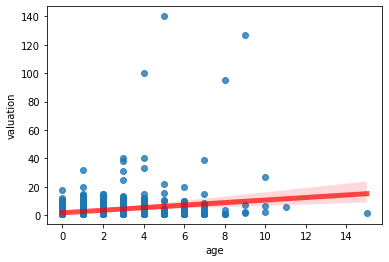

In [48]:
sns.regplot(x=df["age"], y=df["valuation"], line_kws={"color":"r","alpha":0.7,"lw":5})


In [59]:
df.corr(method='pearson')


,valuation,age
valuation,1.000000,0.229647
age,0.229647,1.000000


Aparentemente não existe correlação entre as variáveis, pois 0,2 é baixo. Provavalmente os outliers em questão de valuation comprometeram a análise, mas como meu objetivo é analisar o mercado com base no que acontece, chego a conclusão que Idade X Valuation não possuem correlação.

Comparação Br x Mundo



Comparando os setores pode-se observar que as Fintechs são as líderes tanto no Brasil como no resto do mundo

In [60]:
df.groupby('industry')['valuation'].sum().sort_values(ascending=False).plot.bar()

In [61]:
brasil.groupby('industry')['valuation'].sum().sort_values(ascending=False).plot(kind='bar')

Tanto no Brasil quanto no resto do mundo não ficou clara uma correlação entre idade e valor de mercado 

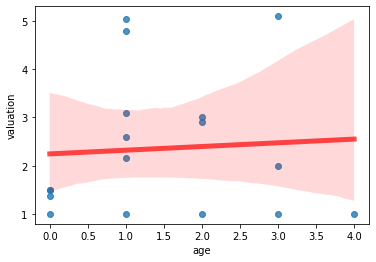

In [64]:
sns.regplot(x=brasil["age"], y=brasil["valuation"], line_kws={"color":"r","alpha":0.7,"lw":5})
#Análise Brasil


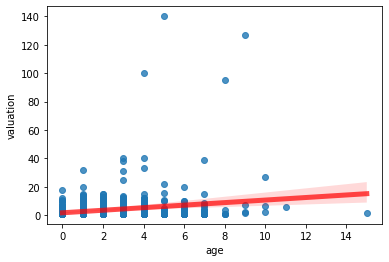

In [65]:
sns.regplot(x=df["age"], y=df["valuation"], line_kws={"color":"r","alpha":0.7,"lw":5})
#Análise resto do mundo


#Conclusão

Estados Unidos e China demonstraram que o tamanho de suas economicas reflete na força de suas empresas. Apesar disso, os americanos estão bem na frente na questão dos unicórnios, seja em valuation, seja em quantidade de empresas.
Também podemos observar que o Brasil está no top 10 de quantidade de unicórnios e em valuation, ou seja, de certa forma as empresas brasileiras conseguiram conquistar um espaço no mercado de startups.

Em relação ao cenário econômico dessas empresas pode-se observar que fintechs, produtoras de softwares e e-commerces são os setores que demonstraram maior força perante as demais, o que também foi valido no cenário brasileiro.

Apesar da diferença econômica, o Brasil se mostrou capaz de criar e estabilizar empresas competitivas em relação ao restante do mundo. Lembrando que empresas consolidadas e presentes na bolsa de valores não estão presentes na análise, ao exemplo da gigante fintech Nubank.

Possibilidades futuras para o projeto
1.   Checar a possibilidade de fazer alguma combinação com esses dados e juntar com outras bases para entender o momento de layoffs no Br.
2.   Buscar base de dados de empresas listadas na bolsa para fazer comparação.
3.   Atrelar essa pesquisa com alguma base de dados que mostre o investimento dos governos em educação e tecnologia, a fim de entender se existe alguma relação;
4.   Destrinchar a quantidade de capital investido por diferentes investidores para identificar quais setores ou empresas possuem mais possibilidade de receber investimento.

Referências:

[Dataset no Kaggle](https://www.kaggle.com/datasets/ramjasmaurya/unicorn-startups)

[Dados sobre Startups](https://www.cbinsights.com/research/unicorn-company-slowdown/?utm_source=CB+Insights+Newsletter&utm_medium=email&utm_campaign=newsletter_general_wed_2022_09_14&utm_term=spiel&utm_content=research-public)